In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import math
import random

Importing the Image Dataset :

In [2]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

In [3]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
# print(X_people)
y_people = people.target[mask]
# print(y_people)

# Scale the grayscale values to be between 0 and 1 instead of 0 and 255 for better numeric stability: 
X_people = X_people / 255

Standardizing the data :

In [4]:
X_S_people = (X_people - np.mean(X_people)) / np.std(X_people, ddof = 1)

Performing PCA on the Data to convert into 100D :

In [5]:
Covariance_matrix = ((X_S_people.T @ X_S_people) / len(X_S_people) - 1)
# print(Covariance_matrix.shape)

E_val, E_vec = np.linalg.eig(Covariance_matrix)

index = E_val.argsort()[::-1] 
E_val = E_val[index]
E_val_D = E_val[:100]
E_vec = E_vec[:, index]
E_vec_D = E_vec[:, :100]

# print(E_val)
# print(E_vec_D)

X_new = np.dot(X_S_people, E_vec_D)
# print(X_new.shape)

Implementing the K-Means algorithm from scratch :

In [6]:
np.random.seed(0)
np.random.shuffle(X_new)

K = 10

# Defining the 10 clusters
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []
C9 = []
C10 = []

# Finding the initial centroids randomly
centroids = random.choices(X_new, k = K)

Iteration_count = []
current_iteration = []
Euclidean_distance = []
previous_iteration = []

for x in range(100):
    previous_iteration.append(0)

for i in range (0, 10000):
            
    # Calculating Euclidean Distance
    for x in range (len(X_new)):
        for y in range (len(centroids)):
            distance = math.sqrt(np.sum(np.square(np.subtract(centroids[y], X_new[x]))))
            Euclidean_distance.append(distance)
        Min_Euclidean_distance = np.argmin(Euclidean_distance)
        
        # Assigning to clusters        
        if Min_Euclidean_distance == 0:
            C1.append(X_new[x])
        elif Min_Euclidean_distance == 1:
            C2.append(X_new[x])
        elif Min_Euclidean_distance == 2:
            C3.append(X_new[x])
        elif Min_Euclidean_distance == 3:
            C4.append(X_new[x])
        elif Min_Euclidean_distance == 4:
            C5.append(X_new[x])
        elif Min_Euclidean_distance == 5:
            C6.append(X_new[x])
        elif Min_Euclidean_distance == 6:
            C7.append(X_new[x])
        elif Min_Euclidean_distance == 7:
            C8.append(X_new[x])
        elif Min_Euclidean_distance == 8:
            C9.append(X_new[x])
        elif Min_Euclidean_distance == 9:
            C10.append(X_new[x])
        Euclidean_distance.clear()
        
    # Finding mean for each Cluster center
    centroids[0] = np.mean(C1, axis = 0)
    centroids[1] = np.mean(C2, axis = 0)
    centroids[2] = np.mean(C3, axis = 0)
    centroids[3] = np.mean(C4, axis = 0)
    centroids[4] = np.mean(C5, axis = 0)
    centroids[5] = np.mean(C6, axis = 0)
    centroids[6] = np.mean(C7, axis = 0)
    centroids[7] = np.mean(C8, axis = 0)
    centroids[8] = np.mean(C9, axis = 0)
    centroids[9] = np.mean(C10, axis = 0)
       
    current_iteration = np.sum(centroids, axis = 0)
    
    # Calculating the L1 distance for Change in iterations
    magnitude_of_change = 0
    
    for x in range(len(current_iteration)):
        magnitude_of_change += abs(current_iteration[x] - previous_iteration[x])
    
    if magnitude_of_change < pow(2,-23):
        break
        
    previous_iteration = current_iteration
    
    C1.clear()
    C2.clear()
    C3.clear()
    C4.clear()
    C5.clear()
    C6.clear()
    C7.clear()
    C8.clear()
    C9.clear()
    C10.clear()
    
    # Iteration counter
    Iteration_count.append(i + 1)

print("Iteration count:", Iteration_count[-1])
print("C1:",len(C1), "\nC2:",len(C2), "\nC3:",len(C3), "\nC4:",len(C4), "\nC5",len(C5), "\nC6:",len(C6), "\nC7:",len(C7), "\nC8:",len(C8), "\nC9:",len(C9), "\nC10:",len(C10))

Iteration count: 32
C1: 215 
C2: 276 
C3: 208 
C4: 281 
C5 208 
C6: 167 
C7: 184 
C8: 133 
C9: 197 
C10: 194


Visualizing cluster centers for K = 10 clusters :

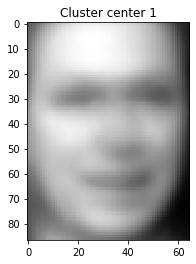

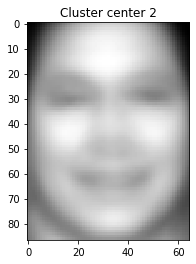

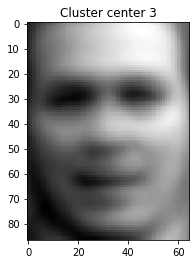

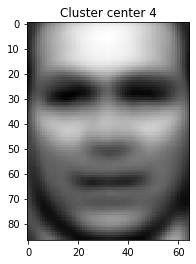

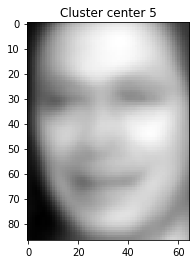

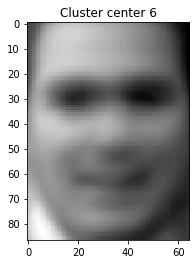

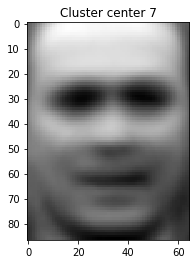

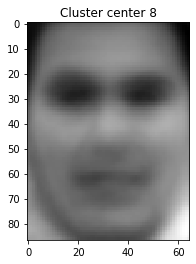

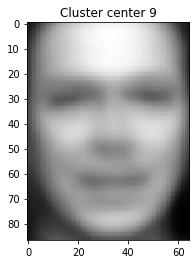

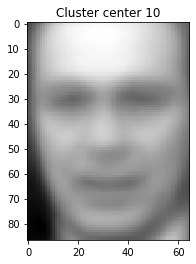

In [7]:
Cluster_center_1 = np.dot(centroids[0], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_1, (87,65)), cmap = cm.gray)
plt.title('Cluster center 1')
plt.show()

Cluster_center_2 = np.dot(centroids[1], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_2, (87,65)), cmap = cm.gray)
plt.title('Cluster center 2')
plt.show()

Cluster_center_3 = np.dot(centroids[2], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_3, (87,65)), cmap = cm.gray)
plt.title('Cluster center 3')
plt.show()

Cluster_center_4 = np.dot(centroids[3], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_4, (87,65)), cmap = cm.gray)
plt.title('Cluster center 4')
plt.show()

Cluster_center_5 = np.dot(centroids[4], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_5, (87,65)), cmap = cm.gray)
plt.title('Cluster center 5')
plt.show()

Cluster_center_6 = np.dot(centroids[5], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_6, (87,65)), cmap = cm.gray)
plt.title('Cluster center 6')
plt.show()

Cluster_center_7 = np.dot(centroids[6], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_7, (87,65)), cmap = cm.gray)
plt.title('Cluster center 7')
plt.show()

Cluster_center_8 = np.dot(centroids[7], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_8, (87,65)), cmap = cm.gray)
plt.title('Cluster center 8')
plt.show()

Cluster_center_9 = np.dot(centroids[8], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_9, (87,65)), cmap = cm.gray)
plt.title('Cluster center 9')
plt.show()

Cluster_center_10 = np.dot(centroids[9], E_vec_D.T)
plt.imshow(np.reshape(Cluster_center_10, (87,65)), cmap = cm.gray)
plt.title('Cluster center 10')
plt.show()

Visualizing the images closest and furthest to the cluster center :

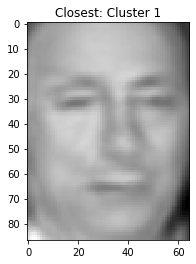

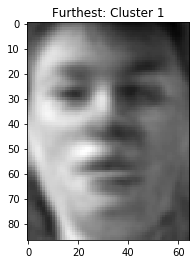

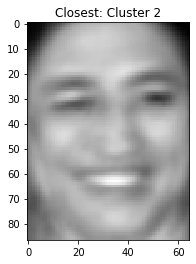

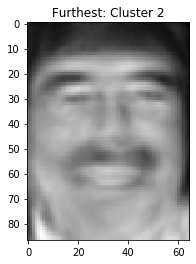

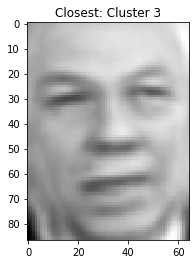

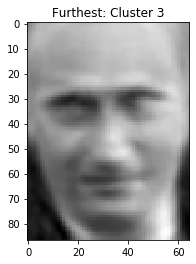

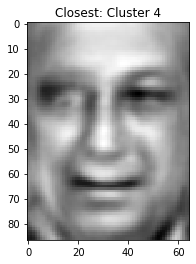

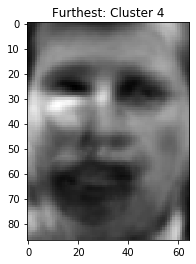

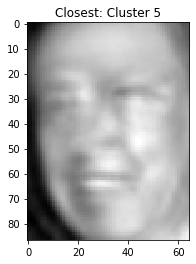

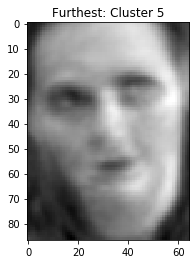

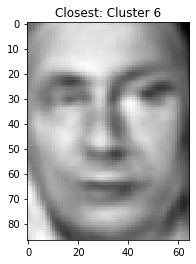

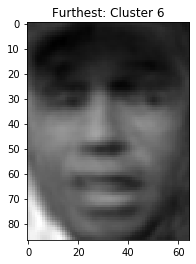

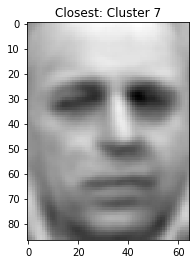

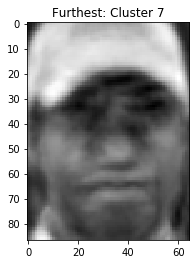

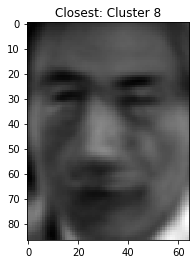

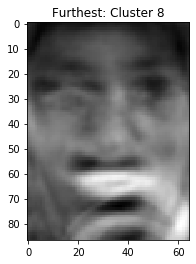

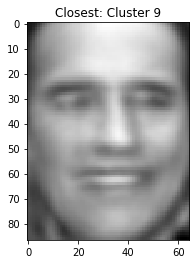

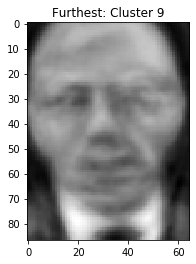

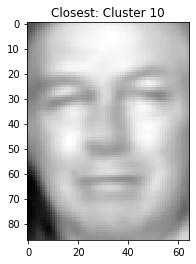

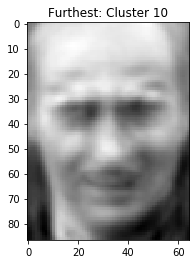

In [8]:
def Closest_image(A, B):
    Euclidean_distance = []
    for x in range (len(A)):
        distance = math.sqrt(np.sum(np.square(np.subtract(B, A[x]))))
        Euclidean_distance.append(distance)
    Min_distance_index = np.argmin(Euclidean_distance)
    return Min_distance_index

def Furthest_image(A, B):
    Euclidean_distance = []
    for x in range (len(A)):
        distance = math.sqrt(np.sum(np.square(np.subtract(B, A[x]))))
        Euclidean_distance.append(distance)
    Max_distance_index = np.argmax(Euclidean_distance)
    return Max_distance_index

CI_Cluster_1 = C1[Closest_image(C1, centroids[0])]
CI_C_1 = np.dot(CI_Cluster_1, E_vec_D.T)
plt.imshow(np.reshape(CI_C_1, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 1')
plt.show()

FI_Cluster_1 = C1[Furthest_image(C1, centroids[0])]
FI_C_1 = np.dot(FI_Cluster_1, E_vec_D.T)
plt.imshow(np.reshape(FI_C_1, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 1')
plt.show()

CI_Cluster_2 = C2[Closest_image(C2, centroids[1])]
CI_C_2 = np.dot(CI_Cluster_2, E_vec_D.T)
plt.imshow(np.reshape(CI_C_2, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 2')
plt.show()

FI_Cluster_2 = C2[Furthest_image(C2, centroids[1])]
FI_C_2 = np.dot(FI_Cluster_2, E_vec_D.T)
plt.imshow(np.reshape(FI_C_2, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 2')
plt.show()

CI_Cluster_3 = C3[Closest_image(C3, centroids[2])]
CI_C_3 = np.dot(CI_Cluster_3, E_vec_D.T)
plt.imshow(np.reshape(CI_C_3, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 3')
plt.show()

FI_Cluster_3 = C3[Furthest_image(C3, centroids[2])]
FI_C_3 = np.dot(FI_Cluster_3, E_vec_D.T)
plt.imshow(np.reshape(FI_C_3, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 3')
plt.show()

CI_Cluster_4 = C4[Closest_image(C4, centroids[3])]
CI_C_4 = np.dot(CI_Cluster_4, E_vec_D.T)
plt.imshow(np.reshape(CI_C_4, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 4')
plt.show()

FI_Cluster_4 = C4[Furthest_image(C4, centroids[3])]
FI_C_4 = np.dot(FI_Cluster_4, E_vec_D.T)
plt.imshow(np.reshape(FI_C_4, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 4')
plt.show()

CI_Cluster_5 = C5[Closest_image(C5, centroids[4])]
CI_C_5 = np.dot(CI_Cluster_5, E_vec_D.T)
plt.imshow(np.reshape(CI_C_5, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 5')
plt.show()

FI_Cluster_5 = C5[Furthest_image(C5, centroids[4])]
FI_C_5 = np.dot(FI_Cluster_5, E_vec_D.T)
plt.imshow(np.reshape(FI_C_5, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 5')
plt.show()

CI_Cluster_6 = C6[Closest_image(C6, centroids[5])]
CI_C_6 = np.dot(CI_Cluster_6, E_vec_D.T)
plt.imshow(np.reshape(CI_C_6, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 6')
plt.show()

FI_Cluster_6 = C6[Furthest_image(C6, centroids[5])]
FI_C_6 = np.dot(FI_Cluster_6, E_vec_D.T)
plt.imshow(np.reshape(FI_C_6, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 6')
plt.show()

CI_Cluster_7 = C7[Closest_image(C7, centroids[6])]
CI_C_7 = np.dot(CI_Cluster_7, E_vec_D.T)
plt.imshow(np.reshape(CI_C_7, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 7')
plt.show()

FI_Cluster_7 = C7[Furthest_image(C7, centroids[6])]
FI_C_7 = np.dot(FI_Cluster_7, E_vec_D.T)
plt.imshow(np.reshape(FI_C_7, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 7')
plt.show()

CI_Cluster_8 = C8[Closest_image(C8, centroids[7])]
CI_C_8 = np.dot(CI_Cluster_8, E_vec_D.T)
plt.imshow(np.reshape(CI_C_8, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 8')
plt.show()

FI_Cluster_8 = C8[Furthest_image(C8, centroids[7])]
FI_C_8 = np.dot(FI_Cluster_8, E_vec_D.T)
plt.imshow(np.reshape(FI_C_8, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 8')
plt.show()

CI_Cluster_9 = C9[Closest_image(C9, centroids[8])]
CI_C_9 = np.dot(CI_Cluster_9, E_vec_D.T)
plt.imshow(np.reshape(CI_C_9, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 9')
plt.show()

FI_Cluster_9 = C9[Furthest_image(C9, centroids[8])]
FI_C_9 = np.dot(FI_Cluster_9, E_vec_D.T)
plt.imshow(np.reshape(FI_C_9, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 9')
plt.show()

CI_Cluster_10 = C10[Closest_image(C10, centroids[9])]
CI_C_10 = np.dot(CI_Cluster_10, E_vec_D.T)
plt.imshow(np.reshape(CI_C_10, (87,65)), cmap = cm.gray)
plt.title('Closest: Cluster 10')
plt.show()

FI_Cluster_10 = C10[Furthest_image(C10, centroids[9])]
FI_C_10 = np.dot(FI_Cluster_10, E_vec_D.T)
plt.imshow(np.reshape(FI_C_10, (87,65)), cmap = cm.gray)
plt.title('Furthest: Cluster 10')
plt.show()